In [136]:
import cv2 as cvision
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.autograd import Variable
import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib inline

In [137]:
class Data:
    def __init__(self,root,csv,batch_size=32):
        self.root=root
        self.csv=pd.read_csv(csv)
        self.batch_size=batch_size
        self.idx=0
        self.image_size = self.set_image_size()
        
        
    def get_next_batch(self):
        x=[]
        y=[]
        tempy=self.csv.iloc[self.idx:self.idx+self.batch_size,:].values
        for row in tempy:
            y.append(self.normalize(row[1:]))
            tempx=cvision.imread(os.path.join(self.root,row[0]))
            tempx=np.array(np.moveaxis(tempx,-1,0),dtype=np.float32)
            x.append(tempx)
            
        self.idx=(self.idx+self.batch_size)%len(self.csv)
        return np.array(x),np.array(y)
    
    
    def get_test_data(self):
        x=[]
        tempy=self.csv.iloc[self.idx:self.idx+self.batch_size,0].values
        for row in tempy:
            tempx=cvision.imread(os.path.join(self.root,row))
            tempx=np.array(np.moveaxis(tempx,-1,0),dtype=np.float32)
            x.append(tempx)
        self.idx=(self.idx+self.batch_size)%len(self.csv)
        return np.array(x)
    
    def set_image_size(self):
        im=self.csv.iloc[0,0]
        im=cvision.imread(os.path.join(self.root,im))
        return im.shape
    
    def normalize(self,arr):
        arr[0] /= self.image_size[1]
        arr[1] /= self.image_size[1]
        arr[2] /= self.image_size[0]
        arr[3] /= self.image_size[0]
        return np.array(arr,dtype=np.float32)
        

In [138]:
train_data=Data('train','training.csv',32)
train_data.image_size

(480, 640, 3)

In [139]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,8,5,1,2)
        self.conv2=nn.Conv2d(8,16,5,1,2)
        self.conv3=nn.Conv2d(16,32,5,1,2)
        self.conv4=nn.Conv2d(32,64,5,1,2)

        self.fc1=nn.Linear(64*30*40,512)
        self.fc2=nn.Linear(512,4)
    
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),2)
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        x=F.max_pool2d(F.relu(self.conv3(x)),2)
        x=F.max_pool2d(F.relu(self.conv4(x)),2)
        
        x=x.view(-1,64*30*40)
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        
        return x
        
net=Net()
# print(net)

In [140]:
params=list(net.parameters())
params[1]

Parameter containing:
tensor([-0.0496, -0.0075,  0.0949, -0.0818, -0.0079,  0.0620,  0.0808,  0.0616],
       requires_grad=True)

In [141]:
criterion=nn.MSELoss()
optim=Adam(net.parameters(),lr=0.001)

In [ ]:
for epoch in range(2):
    
    for i in range(len(train_data.csv)//train_data.batch_size):
        
        x,y=train_data.get_next_batch()
        x,y=Variable(torch.from_numpy(x)),Variable(torch.from_numpy(y))
        optim.zero_grad()        
        out=net(x)
        loss=criterion(out,y)
        loss.backward()
        optim.step()
        
        if(i%100==0):
            print("Epoch :{} Iter : {} Loss : {} ".format(epoch,i,loss))

Epoch :0 Iter : 0 Loss : 0.25891396403312683 
Epoch :0 Iter : 100 Loss : 0.03620637580752373 


#### testing

In [96]:
test_csv=pd.read_csv('test.csv')
test_data=Data('test','test.csv')

In [97]:
net.eval()
y=[]
for i in range((len(test_data.csv)//test_data.batch_size)+1):
    x=test_data.get_test_data()
    print(i,x.shape)
    x=Variable(torch.from_numpy(x))
    try:
        out=net(x).detach().numpy()
        y.extend(out)
    except exception as e:
        print(e)

0 (32, 3, 480, 640)
1 (32, 3, 480, 640)
2 (32, 3, 480, 640)
3 (32, 3, 480, 640)
4 (32, 3, 480, 640)
5 (32, 3, 480, 640)
6 (32, 3, 480, 640)
7 (32, 3, 480, 640)
8 (32, 3, 480, 640)
9 (32, 3, 480, 640)
10 (32, 3, 480, 640)
11 (32, 3, 480, 640)
12 (32, 3, 480, 640)
13 (32, 3, 480, 640)
14 (32, 3, 480, 640)
15 (32, 3, 480, 640)
16 (32, 3, 480, 640)
17 (32, 3, 480, 640)
18 (32, 3, 480, 640)
19 (32, 3, 480, 640)
20 (32, 3, 480, 640)
21 (32, 3, 480, 640)
22 (32, 3, 480, 640)
23 (32, 3, 480, 640)
24 (32, 3, 480, 640)
25 (32, 3, 480, 640)
26 (32, 3, 480, 640)
27 (32, 3, 480, 640)
28 (32, 3, 480, 640)
29 (32, 3, 480, 640)
30 (32, 3, 480, 640)
31 (32, 3, 480, 640)
32 (32, 3, 480, 640)
33 (32, 3, 480, 640)
34 (32, 3, 480, 640)
35 (32, 3, 480, 640)
36 (32, 3, 480, 640)
37 (32, 3, 480, 640)
38 (32, 3, 480, 640)
39 (32, 3, 480, 640)
40 (32, 3, 480, 640)
41 (32, 3, 480, 640)
42 (32, 3, 480, 640)
43 (32, 3, 480, 640)
44 (32, 3, 480, 640)
45 (32, 3, 480, 640)
46 (32, 3, 480, 640)
47 (32, 3, 480, 640)
48

378 (32, 3, 480, 640)
379 (32, 3, 480, 640)
380 (32, 3, 480, 640)
381 (32, 3, 480, 640)
382 (32, 3, 480, 640)
383 (32, 3, 480, 640)
384 (32, 3, 480, 640)
385 (32, 3, 480, 640)
386 (32, 3, 480, 640)
387 (32, 3, 480, 640)
388 (32, 3, 480, 640)
389 (32, 3, 480, 640)
390 (32, 3, 480, 640)
391 (32, 3, 480, 640)
392 (32, 3, 480, 640)
393 (32, 3, 480, 640)
394 (32, 3, 480, 640)
395 (32, 3, 480, 640)
396 (32, 3, 480, 640)
397 (32, 3, 480, 640)
398 (32, 3, 480, 640)
399 (32, 3, 480, 640)
400 (15, 3, 480, 640)


In [98]:
y=np.array(y)
y.shape

(12815, 4)

In [100]:
pred=y[:]

In [101]:
def denormalize(a):
    
    for arr in a:
        arr[0]*=test_data.image_size[1]
        arr[1]*=test_data.image_size[1]
        arr[2]*=test_data.image_size[0]
        arr[3]*=test_data.image_size[0]
    return a
pred=denormalize(pred)
pred[0]

array([271.26675, 493.08325,  77.58963, 484.16904], dtype=float32)

In [102]:
test_csv.iloc[:,1]=pred[:,0]
test_csv.iloc[:,2]=pred[:,1]
test_csv.iloc[:,3]=pred[:,2]
test_csv.iloc[:,4]=pred[:,3]
test_csv.to_csv('predict.csv')

In [134]:
idx=40
v=np.array(test_csv.iloc[idx,1:].values,dtype=np.int32)

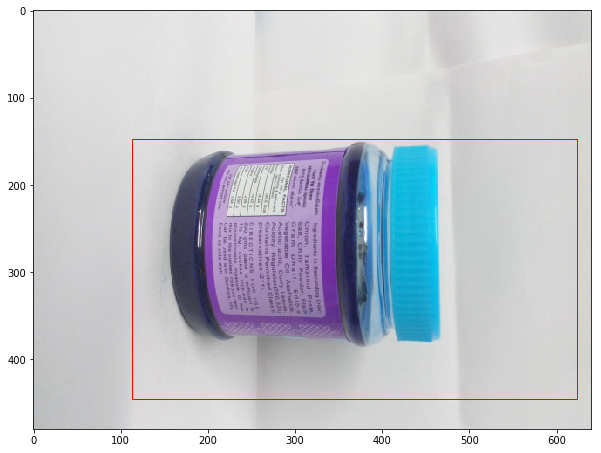

In [135]:
plt.figure(figsize=(10,10))
plt.imshow(cvision.imread(os.path.join('test',test_csv.iloc[idx,0])))
rect=patches.Rectangle((v[0],v[2]),
                       v[1]-v[0],v[3]-v[2],
                  linewidth=1,edgecolor='r',facecolor='none')
plt.gca().add_patch(rect)